<a href="https://colab.research.google.com/github/AycaCicek/ClassificationModels/blob/main/LojistikRegresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import scale,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
import warnings 
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [3]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
y=data["Outcome"]
X=data.drop(["Outcome"],axis=1)
X.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [7]:
loj_model=LogisticRegression(solver="liblinear").fit(X,y)

In [8]:
loj_model.intercept_

array([-5.89182337])

In [9]:
loj_model.coef_

array([[ 1.17051909e-01,  2.83882398e-02, -1.68895484e-02,
         7.55589576e-04, -6.42808920e-04,  5.97634539e-02,
         6.77607988e-01,  7.24042917e-03]])

In [10]:
loj_model.predict(X[0:10])

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [11]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [12]:
y_pred=loj_model.predict(X)

In [13]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]])

In [14]:
accuracy_score(y,y_pred)

0.7747395833333334

In [15]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [16]:
loj_model.predict_proba(X[0:10])

array([[0.35040045, 0.64959955],
       [0.91702289, 0.08297711],
       [0.22474188, 0.77525812],
       [0.92139193, 0.07860807],
       [0.16723613, 0.83276387],
       [0.79899069, 0.20100931],
       [0.8801958 , 0.1198042 ],
       [0.27812825, 0.72187175],
       [0.32059435, 0.67940565],
       [0.92273397, 0.07726603]])

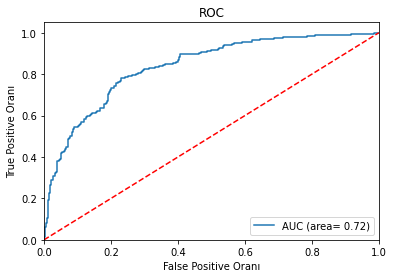

In [18]:
logit_roc_auc=roc_auc_score(y,loj_model.predict(X))
fpr,tpr,thresholds = roc_curve(y,loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC (area= %0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Oranı")
plt.ylabel("True Positive Oranı")
plt.title("ROC")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

MODEL, MODEL PREDICT AND TUNING

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
len(X_train)

537

In [27]:
len(X_test)

231

In [28]:
logistic=LogisticRegression(solver="liblinear").fit(X_train,y_train)

In [29]:
y_pred=logistic.predict(X_test)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [33]:
cross_val_score(logistic,X_test,y_test,cv=10).mean()

0.7748188405797102